<a href="https://colab.research.google.com/github/subhadeepk/cse437-assignments/blob/main/lab1-bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Multi-armed Bandits

This lab explores the multi-armed bandit problem, where an agent must choose among multiple options (arms) with unknown reward distributions to maximize its cumulative reward over time.

In [1]:
%pylab inline
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Number of bandit arms
K = 5 # @param {"type":"integer"}
# Number of trials (time steps)
T = 100  # @param {"type":"integer"}

# Random seed
seed = 0

Text(0.5, 1.02, 'Unknown Reward Distributions for K Bandits')

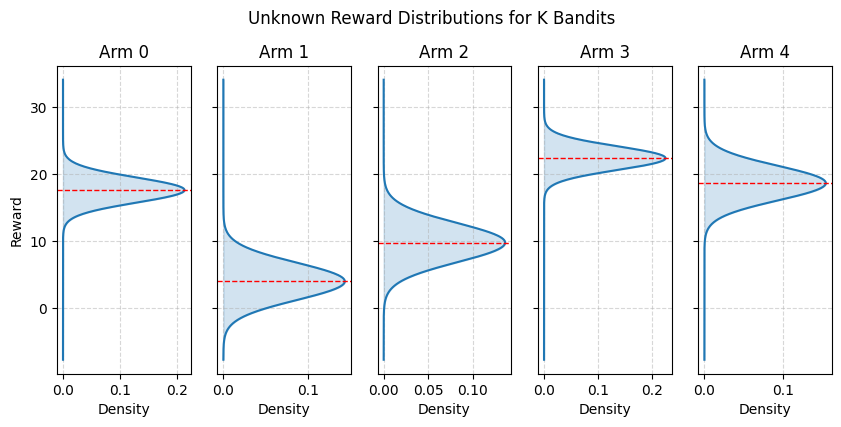

In [3]:
# Stattionary probability distribution for K bandits
np.random.seed(seed)
bandit_mean = 10 * np.random.normal(size=K)
bandit_std = np.random.uniform(1, 3, size=K)




###### Plot disttributions #######
fig, axes = plt.subplots(1, K, figsize=(2*K, 4), sharey=True)

x_min = bandit_mean.min() - 4 * bandit_std.max()
x_max = bandit_mean.max() + 4 * bandit_std.max()
x = np.linspace(x_min, x_max, 500)

for i, ax in enumerate(axes):
    y = norm.pdf(x, loc=bandit_mean[i], scale=bandit_std[i])
    ax.plot(y, x, color="C0")  # vertical orientation
    ax.fill_betweenx(x, 0, y, alpha=0.2, color="C0")
    ax.axhline(bandit_mean[i], color="r", linestyle="--", linewidth=1)  # mean
    ax.set_title(f"Arm {i}")
    ax.set_xlabel("Density")
    if i == 0:
        ax.set_ylabel("Reward")
    ax.grid(True, linestyle="--", alpha=0.5)
plt.suptitle("Unknown Reward Distributions for K Bandits", y=1.02)


Text(0, 0.5, 'Reward')

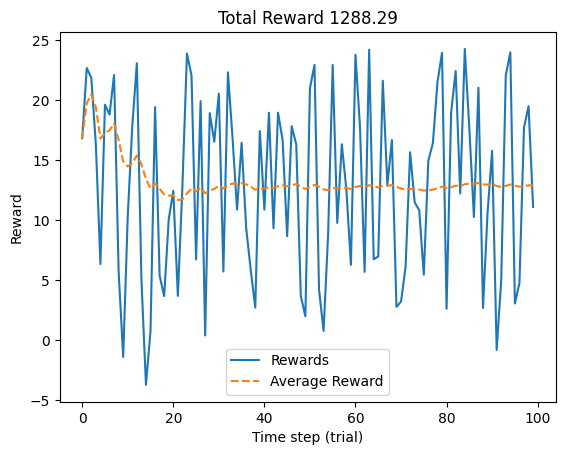

In [11]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  a = np.random.randint(0, K-1)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")




## Exercise 1: Implement Your Own Bandit Policy

In the previous cells, we simulated a multi-armed bandit problem and observed the rewards obtained by choosing arms randomly. While this gives us a baseline, a random policy is unlikely to be the most effective way to maximize rewards.

Your task is to implement your own policy for selecting which bandit arm to pull at each time step `t`. The total reward should be higher than the

Text(0, 0.5, 'Reward')

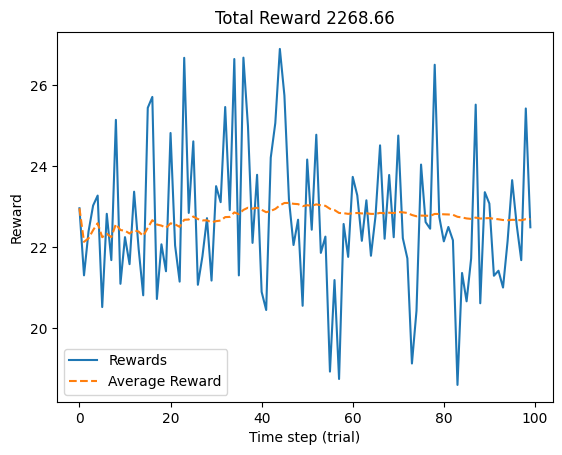

In [64]:
# Rewards
rewards = []
# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
   ############################ YOUR POLICY HERE #################
  random_number = np.random.rand(0,5)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

## Exercise 2: Greedy strategy


1. Implement the greedy strategy: Always choose the arm with the highest estimated average reward.

2. Implement the Epsilon-greedy strategy: with a small probability epsilon, choose a random arm; otherwise, choose the greedy arm.

3. [Optional for 337] Implement Thompson Sampling: Maintain a probability distribution over the expected reward for each arm and sample from these distributions to choose an arm.



In [ ]:
# Rewards
import random
T = 100
rewards = []
rewards_act = np.zeros(K)
avg_reward_act = np.zeros(K)
avg_reward = np.zeros(T)
num_act = np.zeros(K)

############################ YOUR POLICY HERE #################

# Greedy policy works best for this problem. Here epsilon is 1.0 and 0, so it's random for the first 12 steps and greedy for the next 88 steps.
# So the epsilon greedy policy has been made a greedy policy


# For T trials, chose a random arm
for t in range(T):
  epsilon = 1.0 if t < 12 else 0.
  # Action: Choose a random arm
  # epsilon = 0.9
  # Action: Choose a random arm
  random_number = random.random()
  if random_number < epsilon:
    a = np.random.randint(0,K-1)
    #do random
  else:
    a = np.argmax(avg_reward_act)
    # a = argmax(rewards_act)
    #do greedy


  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  num_act[a] += 1
  rewards_act[a] += r
  avg_reward_act[a] = rewards_act[a] / num_act[a]
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

# Questions
After compleing the excercises, answer the following questions:

1. In the epsilon-greedy strategy, compare ε = 0.1 and ε = 0.001. What are the advantages of using a larger ε?
2. If the reward distribution changes smoothly over time, is a purely greedy strategy still effective?
3. How does the choice of ε affect the balance between exploration and exploitation in the long run?  
4. Suppose the number of arms increases significantly. How might this change the effectiveness of the epsilon-greedy strategy?  

1. for epsilon 0.1, it takes exploratory action with a probablility of epsilon. So a larger e would mean that the agent will try to explore more. e = 0.001 would mean it almost never explores and always exploits.

2. No. It'll never have info about the changing distribution,

3. In the long run, a high e wouldn't make sense, as towards the end when it has learned a fairly accurate quality function, it wouldn't make sense to still explore. This wil bring down the reward

4. It would be more effective to explore in this case. So maybe a higher epsilon might be good. More trials would also be useful.

Text(0, 0.5, 'Reward')

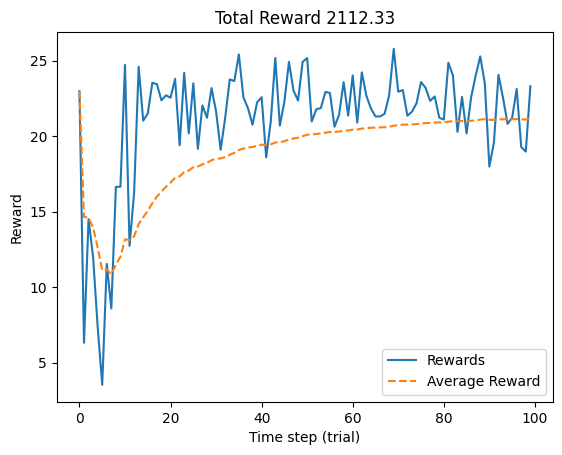

In [63]:
# Rewards
import random
T = 100
rewards = []
rewards_act = np.zeros(K)
avg_reward_act = np.zeros(K)
avg_reward = np.zeros(T)
num_act = np.zeros(K)

############################ YOUR POLICY HERE #################

# For T trials, chose a random arm
for t in range(T):
  epsilon = 1.0 if t < 12 else 0.
  # Action: Choose a random arm
  # epsilon = 0.9
  # Action: Choose a random arm
  random_number = random.random()
  if random_number < epsilon:
    a = np.random.randint(0,K-1)
    #do random
  else:
    a = np.argmax(avg_reward_act)
    # a = argmax(rewards_act)
    #do greedy


  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  num_act[a] += 1
  rewards_act[a] += r
  avg_reward_act[a] = rewards_act[a] / num_act[a]
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")